Forecasting con Series de Datos,foco en series de datos ordenados en el tiempo. Objetivo: identificar y entrenar modelo forecasting.Forecast tiene curso de acción basado en condiciones de negocio,supuesto basados en patrones. (a diferencia de proyección cuyo curso de acción es hipotético).
Python permite capturar mas complejidad e incluir todos los elementos relvantes.Permite hacer ajustes a los indicadores y afinar el modelo para hacerlo mas prolijo.
Autor: Jorge Morales T
Cliente: Kaplan
Proceso: Cobranza
Origen Daos: SAP Business One
Cuenta:Clientes (Abonos)

In [ ]:
import pandas as pd

Origen de datos a partir de ERP, período determinado

In [8]:
datos = pd.read_excel("hRecaudacion.xlsx", parse_dates=['Fecha'])

In [9]:
datos.head()

,Fecha,Recaudacion
0,2018-01-02,9087673
1,2018-01-03,377681130
2,2018-01-04,2403115
3,2018-01-05,49345275
4,2018-01-08,24386226


Definir Fecha como Index

In [12]:
datos = datos.set_index('Fecha')

In [13]:
datos.head()

,Recaudacion
Fecha,
2018-01-02,9087673
2018-01-03,377681130
2018-01-04,2403115
2018-01-05,49345275
2018-01-08,24386226


Resumen por período (día o semana o mes o año)

In [26]:
datos = datos['2018-01-02':'2020-12-31'].resample('W').sum()
datos.head()

,Recaudacion
Fecha,
2018-03-04,855595730
2018-03-11,0
2018-03-18,0
2018-03-25,0
2018-04-01,491798165


In [27]:
#datos = datos['2018-01-02':'2020-12-31'].resample('M').sum()
#datos.head()
#datos.tail()

In [21]:
import warnings
import matplotlib.pyplot as plt

Visualización de los Datos

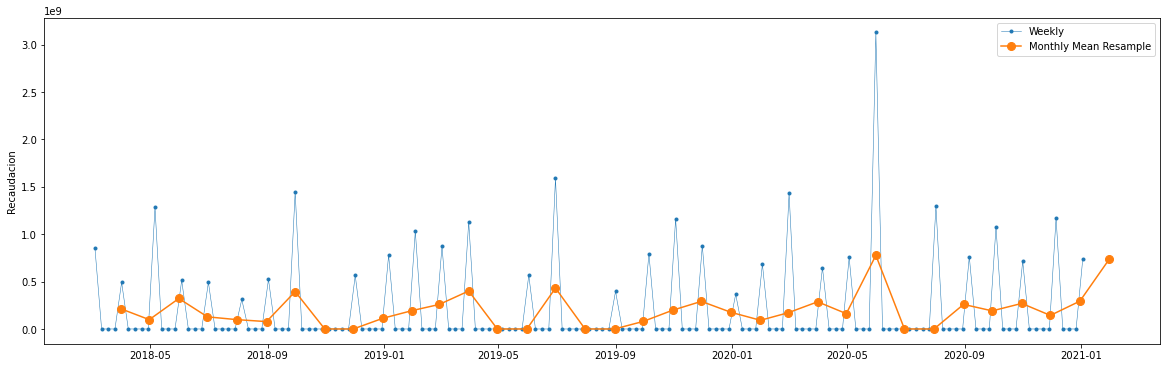

In [30]:
y = datos['Recaudacion']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Recaudacion')
ax.legend();

In [31]:
import statsmodels.api as sm

In [32]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

Descomposicón de los Datos para ver tendencias, patrones o más complejidad en los datos

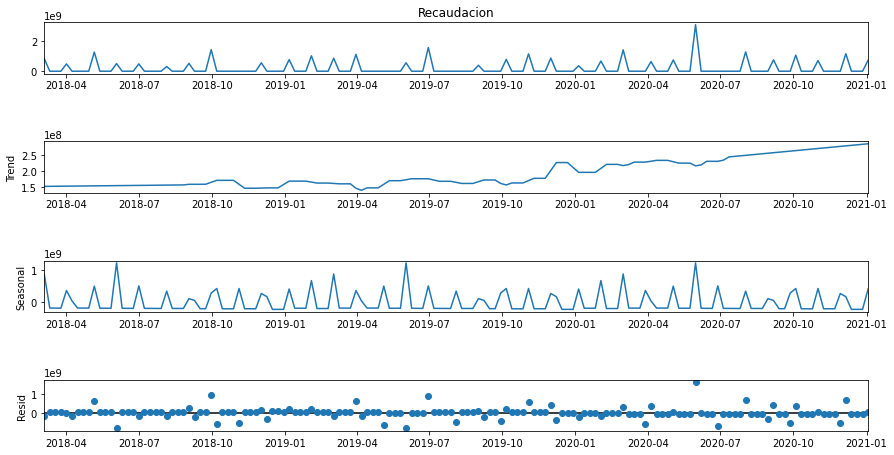

In [33]:
seasonal_decompose(y)